In [210]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


In [211]:
pop_my = pd.read_csv(r"C:\Users\6571kb\OneDrive - BP\Personel\Python\pandas\DOSM 1\population_malaysia.csv")
pop_state = pd.read_csv(r"C:\Users\6571kb\OneDrive - BP\Personel\Python\pandas\DOSM 1\population_state.csv")
pop_district = pd.read_csv(r"C:\Users\6571kb\OneDrive - BP\Personel\Python\pandas\DOSM 1\population_district.csv")

In [212]:
#repair pop for pop_my
pop_my['population'] = pop_my['population'].astype(float)
pop_my['population'] = pop_my['population']*1000

#repair pop for pop_state
pop_state['population'] = pop_state['population'].astype(float)
pop_state['population'] = pop_state['population']*1000

#repair pop for pop_district
pop_district['population'] = pop_district['population'].astype(float)
pop_district['population'] = pop_district['population']*1000


pop_my.sort_index(ascending=False)

,date,sex,age,ethnicity,population
17015,2024-01-01,male,85+,other_noncitizen,11700.0
17014,2024-01-01,male,85+,other_citizen,600.0
17013,2024-01-01,male,85+,indian,4400.0
17012,2024-01-01,male,85+,chinese,14900.0
17011,2024-01-01,male,85+,bumi_other,10000.0
...,...,...,...,...,...
4,1970-01-01,both,15-19,overall,1197600.0
3,1970-01-01,both,10-14,overall,1454700.0
2,1970-01-01,both,5-9,overall,1690300.0
1,1970-01-01,both,0-4,overall,1702400.0


In [213]:
#repair date
pop_my['date']=pd.to_datetime(pop_my['date'])
pop_state['date']=pd.to_datetime(pop_state['date'])
pop_district['date']=pd.to_datetime(pop_district['date'])

pop_my.info()

# add Year column to the table
pop_my['Year'] = pop_my['date'].dt.year
pop_state['Year'] = pop_state['date'].dt.year
pop_district['Year'] = pop_district['date'].dt.year

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17016 entries, 0 to 17015
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        17016 non-null  datetime64[ns]
 1   sex         17016 non-null  object        
 2   age         17016 non-null  object        
 3   ethnicity   17016 non-null  object        
 4   population  17016 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 664.8+ KB


    Year  population
54  2024  34058800.0
53  2023  33401800.0
52  2022  32698100.0
51  2021  32576300.0
50  2020  32447400.0
49  2019  32523000.0
48  2018  32382300.0
47  2017  32022600.0
46  2016  31633500.0
45  2015  31186100.0


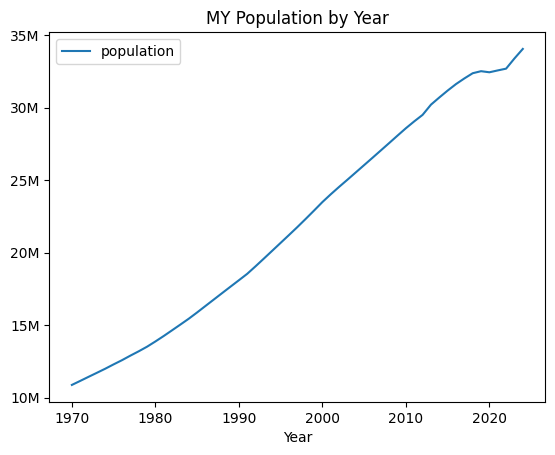

In [214]:
#pivot table 1 from pop_my
pop_my1 = pop_my.loc[(pop_my['sex'].isin(['both']))&(pop_my['age'].isin(['overall']))&(pop_my['ethnicity'].isin(['overall']))]
pop_my1.sort_index(ascending=False)
pop_my1 = pop_my1.groupby(by='Year')['population'].sum().reset_index()
pop_my1 #populations by year

print(pop_my1.sort_index(ascending=False).head(10))


ax = pop_my1.plot(kind='line',x='Year',y='population',title="MY Population by Year")

def millions_formatter(x, pos):
    return f'{x / 1e6:.0f}M'
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

    Year  population
54  2024  34058800.0
53  2023  33401800.0
52  2022  32698100.0
51  2021  32576300.0
50  2020  32447400.0
49  2019  32523000.0
48  2018  32382300.0
47  2017  32022600.0
46  2016  31633500.0
45  2015  31186100.0


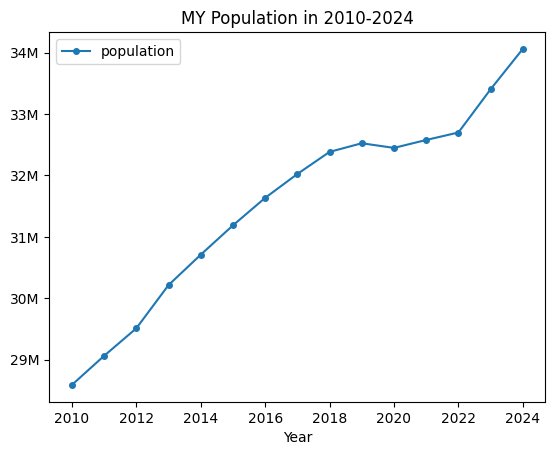

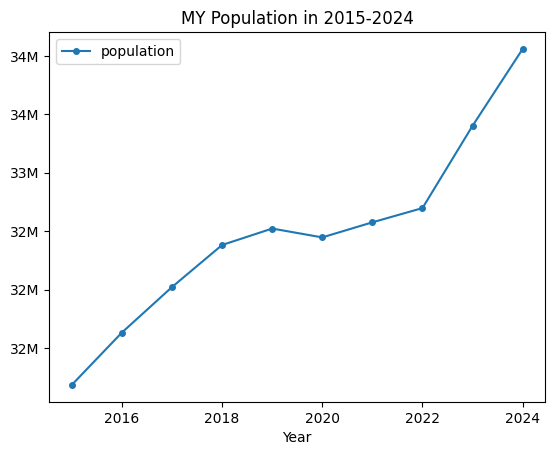

In [215]:
pop_my1A = pop_my1.loc[(pop_my1['Year']>=2010)]
pop_my1B = pop_my1.loc[(pop_my1['Year']>=2015)]


print(pop_my1A.sort_index(ascending=False).head(10))

#graph 1
line_my_total = pop_my1A.plot(kind='line',x='Year',y='population',title="MY Population in 2010-2024", marker='o', markersize=4)

#set format for y-axis
def millions_formatter(x, pos):
    return f'{x / 1e6:.0f}M'
line_my_total.yaxis.set_major_formatter(FuncFormatter(millions_formatter))


#graph 2
line_my_total1 = pop_my1B.plot(kind='line',x='Year',y='population',title="MY Population in 2015-2024", marker='o', markersize=4)

#set format for y-axis
def millions_formatter(x, pos):
    return f'{x / 1e6:.0f}M'
line_my_total1.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

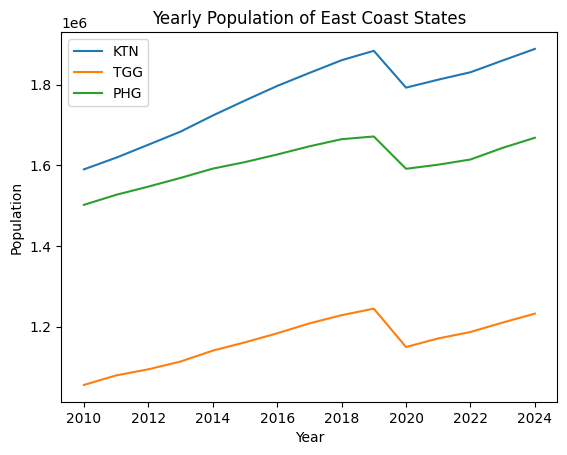

,state,date,sex,age,ethnicity,population,Year
96111,Pahang,2010-01-01,both,overall,overall,1501900.0,2010
96510,Pahang,2011-01-01,both,overall,overall,1526800.0,2011
96909,Pahang,2012-01-01,both,overall,overall,1547100.0,2012
97308,Pahang,2013-01-01,both,overall,overall,1568700.0,2013
97707,Pahang,2014-01-01,both,overall,overall,1591700.0,2014


In [216]:
#population by year and state

#table of pop by year and state from 2010
pop_state_compare = pop_state.loc[(pop_state['age']=='overall')&(pop_state['ethnicity']=='overall')&(pop_state['sex']=='both')&(pop_state['Year']>=2010)]

pop_state_kel = pop_state_compare.loc[(pop_state_compare['state'].isin(['Kelantan']))]
pop_state_tgg = pop_state_compare.loc[(pop_state_compare['state'].isin(['Terengganu']))]
pop_state_phg = pop_state_compare.loc[(pop_state_compare['state'].isin(['Pahang']))]

#plot per states
plt.plot(pop_state_kel['Year'], pop_state_kel['population'],label='KTN')
plt.plot(pop_state_tgg['Year'], pop_state_tgg['population'],label='TGG')
plt.plot(pop_state_phg['Year'], pop_state_phg['population'],label='PHG')

plt.title("Yearly Population of East Coast States")
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.show()

pop_state_phg.head(5)


In [217]:
#population of Melaka

pop_state_mlk = pop_state.loc[(pop_state['state']=='Melaka')]

pop_state_mlk_overallsex = pop_state_mlk.loc[(pop_state_mlk['age']=='overall')&(pop_state_mlk['ethnicity']=='overall')&(pop_state_mlk['sex']=='both')]


pop_state_mlk_male = pop_state_mlk.loc[(pop_state_mlk['age']=='overall')&(pop_state_mlk['ethnicity']=='overall')&(pop_state_mlk['sex']=='male')]

pop_state_mlk_female = pop_state_mlk.loc[(pop_state_mlk['age']=='overall')&(pop_state_mlk['ethnicity']=='overall')&(pop_state_mlk['sex']=='female')]



In [218]:
pop_state_mlk_male.sort_index(ascending=False).head(10)

,state,date,sex,age,ethnicity,population,Year
67931,Melaka,2024-01-01,male,overall,overall,554300.0,2024
67532,Melaka,2023-01-01,male,overall,overall,541900.0,2023
67133,Melaka,2022-01-01,male,overall,overall,528800.0,2022
66734,Melaka,2021-01-01,male,overall,overall,527400.0,2021
66335,Melaka,2020-01-01,male,overall,overall,524900.0,2020
65936,Melaka,2019-01-01,male,overall,overall,465900.0,2019
65537,Melaka,2018-01-01,male,overall,overall,463600.0,2018
65138,Melaka,2017-01-01,male,overall,overall,459200.0,2017
64739,Melaka,2016-01-01,male,overall,overall,453400.0,2016
64340,Melaka,2015-01-01,male,overall,overall,447900.0,2015


,state,date,sex,age,ethnicity,population,Year
62079,Melaka,2010-01-01,both,overall,overall,823600.0,2010
62478,Melaka,2011-01-01,both,overall,overall,833200.0,2011
62877,Melaka,2012-01-01,both,overall,overall,843200.0,2012
63276,Melaka,2013-01-01,both,overall,overall,856700.0,2013
63675,Melaka,2014-01-01,both,overall,overall,871700.0,2014
64074,Melaka,2015-01-01,both,overall,overall,889000.0,2015
64473,Melaka,2016-01-01,both,overall,overall,901100.0,2016
64872,Melaka,2017-01-01,both,overall,overall,913100.0,2017
65271,Melaka,2018-01-01,both,overall,overall,922400.0,2018
65670,Melaka,2019-01-01,both,overall,overall,928400.0,2019


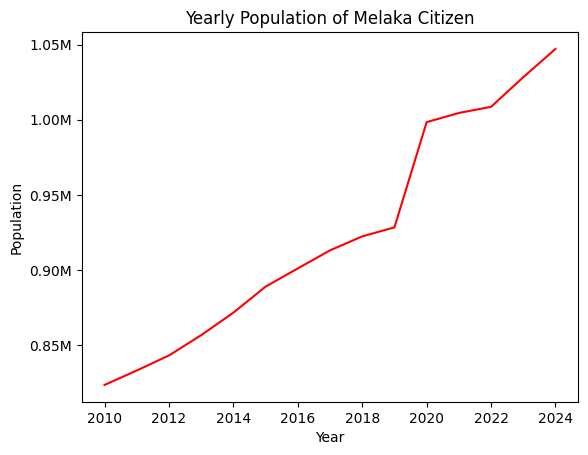

In [244]:


pop_state_mlk_2010 = pop_state_mlk_overallsex.loc[pop_state_mlk_overallsex['Year']>=2010]
plt.plot(pop_state_mlk_2010['Year'],pop_state_mlk_2010['population'],linestyle='-', color='r')

def millions_formatter(x, pos):
    return f'{x / 1e6:.2f}M'


plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.title('Yearly Population of Melaka Citizen')
plt.xlabel('Year')
plt.ylabel('Population')

pop_state_mlk_2010



C:\Users\6571kb\AppData\Local\Temp\ipykernel_25988\3931093659.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popMLK1['sex'] = popMLK1['sex'].replace({'female' : 'F', 'male' : 'M'})
C:\Users\6571kb\AppData\Local\Temp\ipykernel_25988\3931093659.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Year  sex
2017  F      1,815,100
      M      1,837,100
2018  F      1,835,100
      M      1,854,300
2019  F      1,850,600
      M      1,863,300
2020  F      1,893,900
      M      2,099,500
2021  F      1,908,100
      M      2,109,400
2022  F      1,919,200
      M      2,114,300
2023  F      1,945,400
      M      2,167,200
2024  F      1,971,200
      M      2,216,800
Name: 

Text(0, 0.5, 'Population')

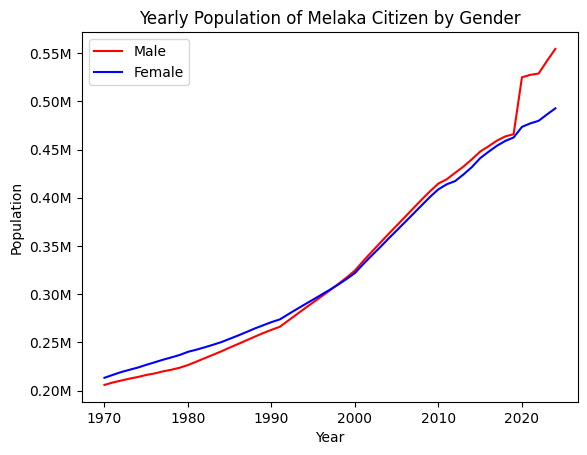

In [220]:
popMLK1 = pop_state_mlk.loc[(pop_state_mlk['sex'].isin(['female','male']))&(pop_state_mlk['Year']>=2017)]
popMLK1['sex'] = popMLK1['sex'].replace({'female' : 'F', 'male' : 'M'})

popMLK2 = popMLK1.pivot_table(index='Year', columns='sex', values='population', aggfunc='sum')

popMLK1 = popMLK1.groupby(by=['Year','sex']).agg({'population':'sum'}).sort_values(by='Year',ascending=True)


popMLK1.iloc[:, :] = popMLK1.iloc[:, :].apply(lambda x: x.apply(lambda y: '{:,}'.format(int(y))))
popMLK2.iloc[:, :] = popMLK2.iloc[:, :].apply(lambda x: x.apply(lambda y: '{:,}'.format(int(y))))

popMLK2

#create plot
a111 = plt.plot(pop_state_mlk_male['Year'], pop_state_mlk_male['population'],linestyle='-', color='r' ,label='Male')
b111 = plt.plot(pop_state_mlk_female['Year'], pop_state_mlk_female['population'],linestyle='-', color='b' ,label='Female')

#format number
def millions_formatter(x, pos):
    return f'{x / 1e6:.2f}M'


plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.legend()
plt.title('Yearly Population of Melaka Citizen by Gender')
plt.xlabel('Year')
plt.ylabel('Population')



In [221]:
pop_district.head(15)

,state,district,date,sex,age,ethnicity,population,Year
0,Johor,Batu Pahat,2020-01-01,both,overall,overall,495300.0,2020
1,Johor,Batu Pahat,2020-01-01,both,overall,bumi_malay,311300.0,2020
2,Johor,Batu Pahat,2020-01-01,both,overall,bumi_other,5100.0,2020
3,Johor,Batu Pahat,2020-01-01,both,overall,chinese,140100.0,2020
4,Johor,Batu Pahat,2020-01-01,both,overall,indian,6900.0,2020
5,Johor,Batu Pahat,2020-01-01,both,overall,other_citizen,1800.0,2020
6,Johor,Batu Pahat,2020-01-01,both,overall,other_noncitizen,30200.0,2020
7,Johor,Batu Pahat,2020-01-01,both,0-4,overall,30300.0,2020
8,Johor,Batu Pahat,2020-01-01,both,0-4,bumi_malay,21300.0,2020
9,Johor,Batu Pahat,2020-01-01,both,0-4,bumi_other,500.0,2020


In [222]:
#create df to have only Melaka

pop_district_mlk_overall = pop_district.loc[(pop_district['age']!='overall')&(pop_district['sex']!='overall')&(pop_district['ethnicity']!='overall')&(pop_district['state']=='Melaka')]
pop_district_mlk_overall.sort_index(ascending=False).head(10)

,state,district,date,sex,age,ethnicity,population,Year
310763,Melaka,Melaka Tengah,2024-01-01,female,85+,other_noncitizen,0.0,2024
310762,Melaka,Melaka Tengah,2024-01-01,female,80-84,other_noncitizen,0.0,2024
310761,Melaka,Melaka Tengah,2024-01-01,female,75-79,other_noncitizen,0.0,2024
310760,Melaka,Melaka Tengah,2024-01-01,female,70-74,other_noncitizen,0.0,2024
310759,Melaka,Melaka Tengah,2024-01-01,female,65-69,other_noncitizen,100.0,2024
310758,Melaka,Melaka Tengah,2024-01-01,female,60-64,other_noncitizen,100.0,2024
310757,Melaka,Melaka Tengah,2024-01-01,female,55-59,other_noncitizen,200.0,2024
310756,Melaka,Melaka Tengah,2024-01-01,female,50-54,other_noncitizen,200.0,2024
310755,Melaka,Melaka Tengah,2024-01-01,female,45-49,other_noncitizen,500.0,2024
310754,Melaka,Melaka Tengah,2024-01-01,female,40-44,other_noncitizen,1000.0,2024


In [243]:
#filter to 2024 Melaka
pop_district_mlk_overall_2024 = pop_district_mlk_overall.loc[pop_district_mlk_overall['Year']==2024]
#rename ethnicity
pop_district_mlk_overall_2024['ethnicity'] = pop_district_mlk_overall_2024['ethnicity'].replace({'bumi_malay':'Malay', 'bumi_other':'Bumiputera','chinese':'Chinese','indian' :'Indian','other_citizen':'Other','other_noncitizen' :'PR'})
a112 = pop_district_mlk_overall_2024.groupby(by=['state','district','ethnicity']).agg({'population' : 'sum'}).sort_values(by=['district','population'],ascending=[True,False])


def millions_formatter(x,pos):
    return f'{x / 1e6 :.2f}M'

#a112.iloc[:, :] = a112.iloc[:, :].apply(lambda x: x.apply(lambda y: '{:,}'.format(int(y))))


a113 = pop_district_mlk_overall_2024.pivot_table(index='ethnicity', values='population',columns=['state','district'], aggfunc='sum', margins=True, margins_name='Total')
a113 = a113.sort_values(by='Total', ascending=False)

a113.iloc[:, :] = a113.iloc[:, :].apply(lambda x: x.apply(lambda y: '{:,}'.format(int(y))))

a113


C:\Users\6571kb\AppData\Local\Temp\ipykernel_25988\248730080.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_district_mlk_overall_2024['ethnicity'] = pop_district_mlk_overall_2024['ethnicity'].replace({'bumi_malay':'Malay', 'bumi_other':'Bumiputera','chinese':'Chinese','indian' :'Indian','other_citizen':'Other','other_noncitizen' :'PR'})
C:\Users\6571kb\AppData\Local\Temp\ipykernel_25988\248730080.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'ethnicity
Total         259,900
Malay         188,500
Chinese        27,700
PR             22,700
Indian         18,300
Bumiputera      2,500
Other             200
Name: (Melaka, Alor Gajah), dtype: object' has dtype incom

state          Melaka                             Total
district   Alor Gajah    Jasin Melaka Tengah           
ethnicity                                              
Total         259,900  155,000       630,000  1,044,900
Malay         188,500  117,100       378,500    684,100
Chinese        27,700   12,500       163,100    203,300
PR             22,700   12,400        56,200     91,300
Indian         18,300   11,900        22,100     52,300
Bumiputera      2,500      900         6,100      9,500
Other             200      200         4,000      4,400